<h1 style="color:skyblue;">Assignment -3</h1>

<h1 style="color:orange;">Part - I</h1>

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df=pd.read_csv("iris_train.csv",index_col=0)
df1=pd.read_csv("iris_test.csv",index_col=0)

In [3]:
X_train=df.iloc[:,:-1].T.values
X_tr=X_train.copy()
Y_train=np.array(df.iloc[:,-1])
X_test=df1.iloc[:,:-1].T.values
X_ts=X_test.copy()
Y_test=np.array(df1.iloc[:,-1])

In [4]:
def mean_(arr):
    return np.sum(arr)/len(arr)


In [5]:
def std_(arr):
    newd= (arr-mean_(arr))**2
    num=np.sum(newd)
    return np.sqrt(num/len(arr))


<h3 style="color:purple;">Perfoming PCA on X_train and X_test</h3>

In [6]:
X_train.shape
for i in range(0,4):
    X_train[i]=X_train[i]-mean_(X_train[i])
    X_test[i]=X_test[i]-mean_(X_test[i])

In [7]:
X_train

array([[-1.20916667, -0.10916667,  0.89083333, -1.00916667, -1.40916667,
         0.49083333,  0.59083333, -0.60916667, -0.80916667, -0.60916667,
        -0.00916667,  0.19083333,  0.89083333, -0.40916667, -0.40916667,
        -0.30916667,  0.49083333,  0.59083333,  0.79083333,  1.39083333,
        -0.10916667,  1.79083333, -0.20916667, -0.70916667,  1.89083333,
        -0.00916667, -0.60916667, -0.80916667, -0.70916667, -0.80916667,
         0.49083333, -1.00916667, -0.80916667, -0.70916667, -0.20916667,
        -0.70916667, -0.10916667,  1.89083333, -1.20916667,  0.39083333,
        -0.10916667, -0.30916667,  0.19083333, -0.00916667,  0.19083333,
        -0.40916667,  0.39083333, -0.30916667, -0.40916667, -0.80916667,
         0.59083333, -0.80916667, -0.80916667, -0.30916667,  0.89083333,
        -0.90916667, -0.00916667, -0.80916667, -0.80916667,  0.09083333,
        -0.70916667,  1.09083333,  0.19083333,  0.29083333,  1.89083333,
        -0.30916667, -1.40916667, -1.50916667,  0.1

In [8]:
Cv1=np.dot(X_train,X_train.T)
Cv2=np.dot(X_test,X_test.T)

In [9]:
eigen_value1,eigen_vector1=np.linalg.eig(Cv1)
eigen_value2,eigen_vector2=np.linalg.eig(Cv2)


In [10]:
Q1=eigen_vector1.T[0]
Q2=eigen_vector2.T[0]

In [11]:
red_x_train=np.dot(X_tr.T,Q1.T)
red_x_test=np.dot(X_ts.T,Q2.T)

In [39]:
red_x_test

array([6.48301376, 3.37868613, 9.36080695, 6.37861702, 6.89723943,
       3.16280886, 5.39146286, 7.49805426, 6.50033072, 5.6978117 ,
       7.23523399, 2.77633974, 2.94861334, 2.89124567, 2.98882916,
       6.66764342, 7.91950226, 5.60206016, 6.20280538, 7.72622741,
       2.93311512, 6.85919897, 3.10197824, 7.68965285, 8.8141878 ,
       7.51724619, 7.88102066, 8.13710826, 2.84948886, 2.97660066])

<h3 style="color:purple;">Now Calculating Prior and Posterior Probability </h3>

In [13]:
def pdf(x,mean,std):
    coefficient = 1 / (std * math.sqrt(2 * math.pi))
    exponent = -((x - mean) ** 2) / (2 * std** 2)
    return coefficient * math.exp(exponent)


### Extracting Different Classes

In [14]:
setosa=[]
virginica=[]
versicolor=[]
for i,v in enumerate(Y_train):
    if v=="Iris-setosa":
        setosa.append(red_x_train[i])
    elif v=="Iris-versicolor":
        versicolor.append(red_x_train[i])
    elif v=="Iris-virginica":
        virginica.append(red_x_train[i])
    

In [15]:
mean_c1=mean_(setosa)
mean_c2=mean_(versicolor)
mean_c3=mean_(virginica)
std_c1=std_(setosa)
std_c2=std_(versicolor)
std_c3=std_(virginica)

### Calculating Prior Probability

In [16]:
def prior(arr):
    dic={}
    prior={}
    for i in arr:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    for i in dic:
        prior[i]= dic[i]/len(arr)
    return prior
        
prior_prob=prior(Y_train)
prior_prob

{'Iris-setosa': 0.3333333333333333,
 'Iris-versicolor': 0.3416666666666667,
 'Iris-virginica': 0.325}

### Calculating Posterior Probability and Making Predictions

In [17]:
l2=[]
for i in prior_prob:
    l2.append(prior_prob[i])
y_pred=[]
for i in red_x_test:
    prob_c1=pdf(i,mean_c1,std_c1)*l2[0]
    prob_c2=pdf(i,mean_c2,std_c2)*l2[1]
    prob_c3=pdf(i,mean_c3,std_c3)*l2[2]
    posterior=max(prob_c1,prob_c2,prob_c3)
    if posterior==prob_c1:
        y_pred.append(list(prior_prob.keys())[0])
    elif posterior==prob_c2:
        y_pred.append(list(prior_prob.keys())[1])
    else:
        y_pred.append(list(prior_prob.keys())[2])
y_pred=np.array(y_pred)
    

In [18]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

<h3 style="color:purple;">Computing The Accuracy Score and Confusion Matrix</h3>

In [19]:
def accuracy_score(y_test,y_pred):
    if y_test.shape!=y_pred.shape:
        raise ValueError("Accuracy Score cannot be calculated for different sizes")
        return
    acc=0
    for i,v in enumerate(y_test):
        if v==y_pred[i]:
            acc+=1
    return (acc/len(y_test))*100 

In [20]:
print(f'The accuracy score for the dimension reduced data is {accuracy_score(Y_test,y_pred)} %')

The accuracy score for the dimension reduced data is 96.66666666666667 %


### Computing Confusion Matrix by user-defined function

In [21]:
def confusionmatrix(y_true,y_pred):
    cm=np.zeros((3,3))

    for i in range(len(y_true)):
        if y_true[i] == 'Iris-setosa' and y_pred[i] == 'Iris-setosa':
          cm[0, 0] += 1  
        elif y_true[i] == 'Iris-versicolor' and y_pred[i] == 'Iris-setosa':
          cm[1, 0] += 1  
        elif y_true[i] == 'Iris-virginica' and y_pred[i] == 'Iris-setosa':
          cm[2, 0] += 1 
        elif y_true[i] == 'Iris-setosa' and y_pred[i] == 'Iris-versicolor':
          cm[0, 1] += 1  
        elif y_true[i] == 'Iris-versicolor' and y_pred[i] == 'Iris-versicolor':
          cm[1, 1] += 1  
        elif y_true[i] == 'Iris-virginica' and y_pred[i] == 'Iris-versicolor':
          cm[2, 1] += 1  
        elif y_true[i] == 'Iris-setosa' and y_pred[i] == 'Iris-virginica':
          cm[0, 2] += 1 
        elif y_true[i] == 'Iris-versicolor' and y_pred[i] == 'Iris-virginica':
          cm[1, 2] += 1 
        elif y_true[i] == 'Iris-virginica' and y_pred[i] == 'Iris-virginica':
          cm[2, 2] += 1  
    return cm

In [22]:
confusionmatrix(Y_test,y_pred)

array([[10.,  0.,  0.],
       [ 0.,  8.,  1.],
       [ 0.,  0., 11.]])

### Computing Confusion Matrix using Inbuilt Library

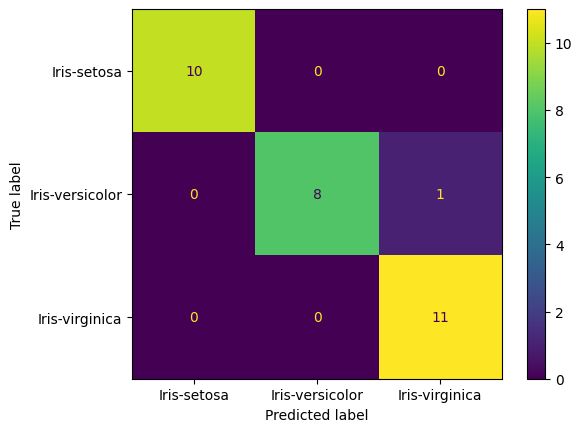

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
cmp=ConfusionMatrixDisplay(cm,display_labels=prior_prob.keys())
cmp.plot()


<h1 style="color:orange;">Part - II</h1>

In [24]:
X_tr=X_tr.T
Y_train
X_ts=X_ts.T
Y_test
X_ts

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

<h3 style="color:purple;">Now Calculating Prior and Posterior Probability </h3>

### Calculating the Posterior Probability

In [25]:
def prob_multidim(x,mu,cov):
    a=x - mu
    coef=1/(((2*math.pi)**2)*(np.linalg.det(cov)**0.5))
    expo1= np.dot(a,np.linalg.inv(cov)).dot(a.T)
    exponent=(-1*expo1)/2
    return coef*np.exp(exponent)
    

In [26]:
setosa1=[]
versicolor1=[]
virginica1=[]
for i,v in enumerate(Y_train):
    if v=="Iris-setosa":
        setosa1.append(X_tr[i])
    elif v=="Iris-versicolor":
        versicolor1.append(X_tr[i])
    elif v=="Iris-virginica":
        virginica1.append(X_tr[i])
setosa1=np.array(setosa1)
versicolor1=np.array(versicolor1)
virginica1=np.array(virginica1)


In [27]:
def mean_new(class1):
    mean_ans=[]
    data=class1.T
    for i in data:
           mean_ans.append(np.mean(i))
    mean_ans=np.array(mean_ans)
    return mean_ans

In [28]:
mean_c1=mean_new(setosa1)
mean_c2=mean_new(versicolor1)
mean_c3=mean_new(virginica1)
cov_c1=np.dot((setosa1-mean_c1).T,(setosa1-mean_c1))/setosa1.shape[0]
cov_c2=np.dot((versicolor1-mean_c2).T,(versicolor1-mean_c2))/versicolor1.shape[0]
cov_c3=np.dot((virginica1-mean_c3).T,(virginica1-mean_c3))/virginica1.shape[0]

In [29]:
prior_prob

{'Iris-setosa': 0.3333333333333333,
 'Iris-versicolor': 0.3416666666666667,
 'Iris-virginica': 0.325}

In [30]:
np.linalg.inv(cov_c1)

array([[ 20.79596731, -13.6935214 ,  -5.79557875,  -1.45522242],
       [-13.6935214 ,  15.99821673,   2.03709134,  -4.54226026],
       [ -5.79557875,   2.03709134,  35.59382225, -15.82508371],
       [ -1.45522242,  -4.54226026, -15.82508371, 101.09304551]])

In [31]:
prior_p=[]
for i in prior_prob:
    prior_p.append(prior_prob[i])

<h3 style="color:purple;">Calculating Posterior Probability and making Predictions</h3>

In [32]:
y_pred_new=[]
for i in X_ts:
    prob_c1=prob_multidim(i,mean_c1,cov_c1)*prior_p[0]
    prob_c2=prob_multidim(i,mean_c2,cov_c2)*prior_p[1]
    prob_c3=prob_multidim(i,mean_c3,cov_c3)*prior_p[2]
    ans=max(prob_c1,prob_c2,prob_c3)
    # print(f'{i}-->{prob_c1}--->{prob_c2}--->{prob_c3}')
    if ans==prob_c1:
        y_pred_new.append(list(prior_prob.keys())[0])
    elif ans==prob_c2:
        y_pred_new.append(list(prior_prob.keys())[1])
    elif ans==prob_c3:
        y_pred_new.append(list(prior_prob.keys())[2])
y_pred_new=np.array(y_pred_new)

<h3 style="color:red;">Computing Accuracy Score and Confusion Matrix </h3>

In [33]:
print(f'The accuracy score for the 4-D Data is {accuracy_score(Y_test,y_pred_new)}%')

The accuracy score for the 4-D Data is 96.66666666666667%


### User Defined Function Confusion Matrix

In [34]:
confusionmatrix(Y_test,y_pred_new)

array([[10.,  0.,  0.],
       [ 0.,  8.,  1.],
       [ 0.,  0., 11.]])

### Confusion Matrix using Inbuilt Function

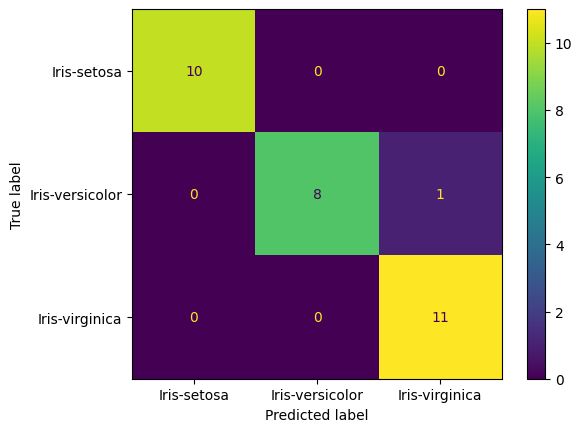

In [35]:
cm_new=confusion_matrix(Y_test,y_pred_new)
cmp_new=ConfusionMatrixDisplay(cm_new,display_labels=prior_prob.keys())
cmp_new.plot()

<h1 style="color:orange;">Part - III</h1>

In [36]:
accuracyscore_1=accuracy_score(Y_test,y_pred)
accuracyscore_2=accuracy_score(Y_test,y_pred_new)

In [37]:
print(f'The difference of the accuracy scores are coming out to be {round(accuracyscore_1-accuracyscore_2)} .')

The difference of the accuracy scores are coming out to be 0 .
